In [26]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

|컬럼 |내용|
|---|---|
sessionID | 세션 ID|
userID | 사용자 ID|
TARGET | 세션에서 발생한 총 조회수|
browser | 사용된 브라우저|
OS | 사용된 기기의 운영체제|
device | 사용된 기기|
new | 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)|
quality | 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)|
duration | 총 세션 시간 (단위: 초)|
bounced | 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)|
transaction | 세션 내에서 발생의 거래의 수|
transaction_revenue | 총 거래 수익|
continent | 세션이 발생한 대륙|
subcontinent | 세션이 발생한 하위 대륙|
country | 세션이 발생한 국가|
traffic_source | 트래픽이 발생한 소스|
traffic_medium | 트래픽 소스의 매체|
keyword | 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정|
referral_path | traffic_medium이 referral인 경우 설정되는 경로|

## 데이터 로드 

In [27]:
df = pd.read_csv("D:/3차프로젝트/Weblog_Data/train.csv")
test = pd.read_csv("D:/3차프로젝트/Weblog_Data/test.csv")

df.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


## 데이터 EDA
keyword, referral_path 에서 결측치가 존재하는 것을 확인

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [29]:
# duration,transaction_revenue 등 값의 범위가 매우 크기 때문에 데이터 스케일링을 진행할 필요성이 있어보인다. 
df.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


In [30]:
## userID에 중복이 존재한다. (나머지는 중복이 있지만, 카테고리.)
df.describe(include='object')

,sessionID,userID,browser,OS,device,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
count,252289,252289,252289,252289,252289,252289,252289,252289,252289,252289,114614,91182
unique,252289,206024,70,21,3,6,23,205,168,7,623,1578
top,SESSION_000000,USER_002675,Chrome,Windows,desktop,Americas,Northern America,United States,google,organic,Category8,Category1
freq,1,78,174395,88119,167133,126506,111945,104201,116007,107370,103584,18687


### 결측치
keyword, referral_path 결측치가 너무 많아 삭제하기에는 데이터 손실로 인하여 대체법 생각

In [31]:
df.isnull().sum()

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

### 범주형 중복 데이터 확인

In [32]:
# object_col = df.describe(include ='object').columns.tolist()

# for col in object_col:
#     print(f"{col}중복 데이터:{sum(df[col].duplicated())}")

### 데이터 시각화

#### 연속형 데이터 시각화
많은 이상치가 존재한다. 따라서 이상치를 각각 처리를 고민해야 된다.

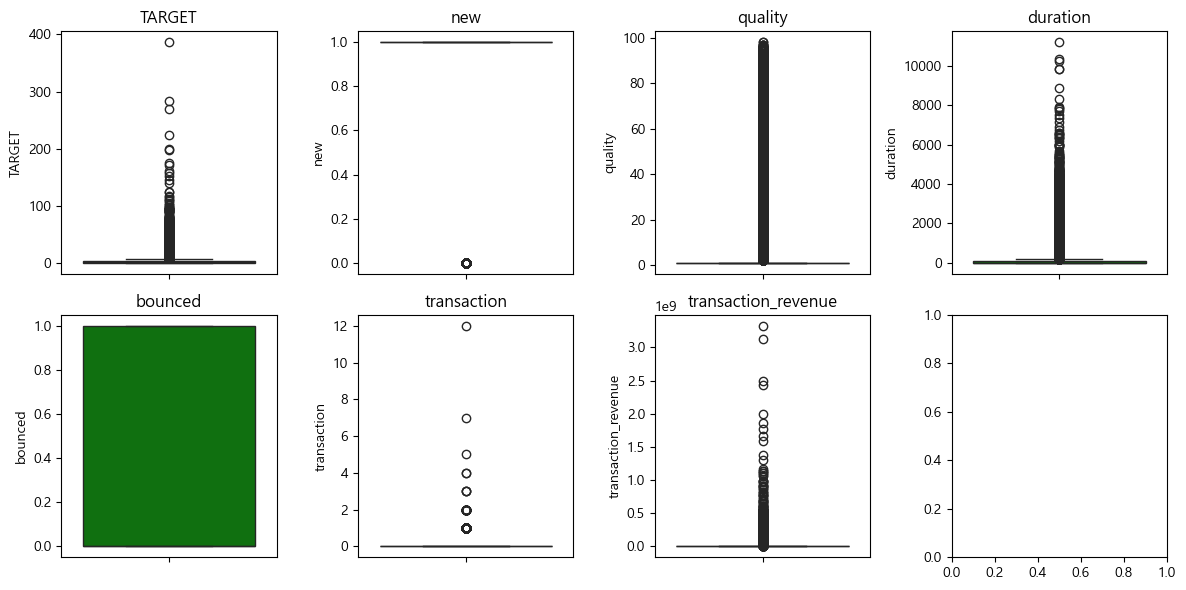

In [33]:
num_cols = df.describe().columns.tolist()
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

## 박스플롯
for idx, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[idx//4, idx%4], color='g') 
    axes[idx//4, idx%4].set_title(col)
 
plt.tight_layout()
plt.show()

#### 범주형 데이터 시각화

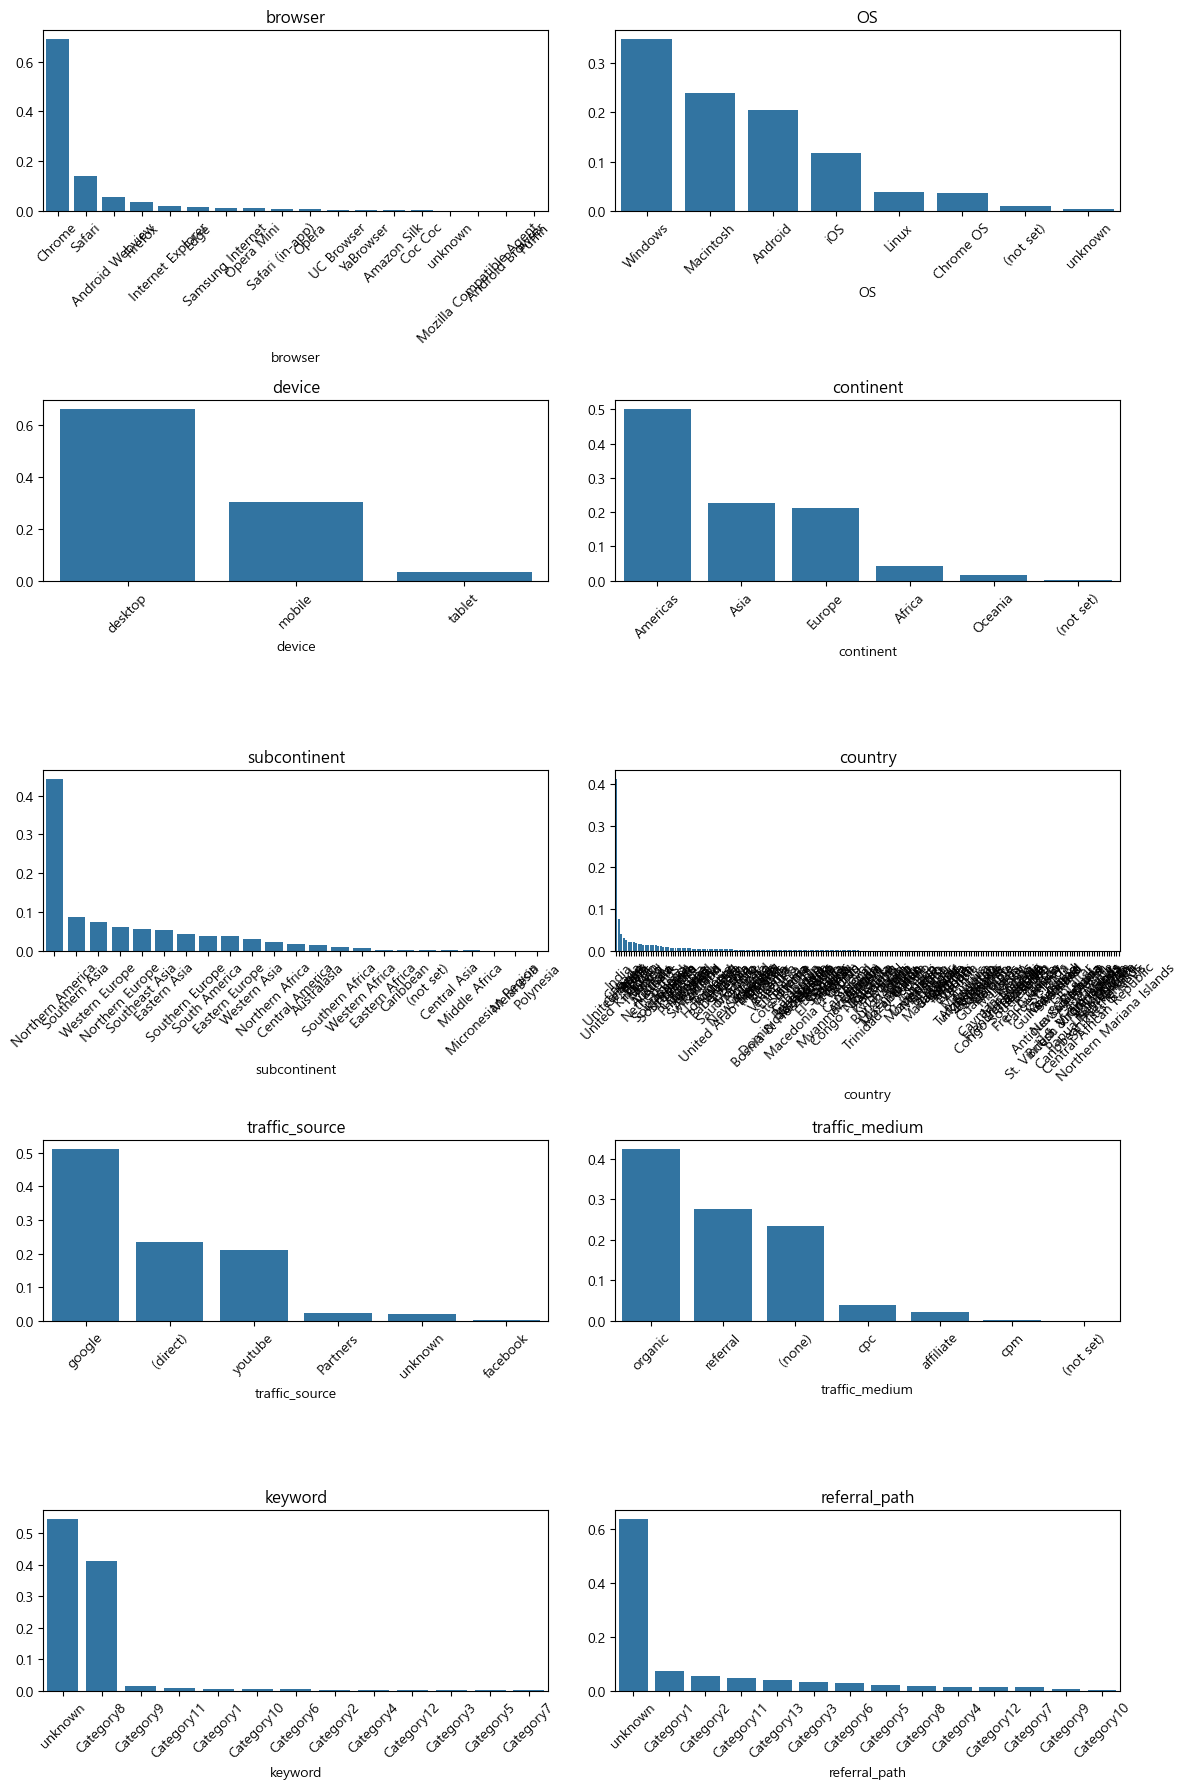

In [50]:
object_col = df.describe(include ='object').columns.tolist()[2:]
fig, axes = plt.subplots(5, 2, figsize=(12, 18))

for i, col in enumerate(object_col):  
    counts = df[col].value_counts(normalize=True).values
    categories = df[col].value_counts(normalize=True).index
    
    sns.barplot(x=categories, y=counts, ax=axes[i//2, i%2])
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
    axes[i//2, i%2].set_title(col)
    
plt.tight_layout()
plt.show()

## 데이터 전처리

### 결측치 전처리

In [35]:
## keyword
df['keyword'].fillna("unknown",inplace=True)
test['keyword'].fillna("unknown",inplace=True)

## referral_path
df['referral_path'].fillna("unknown",inplace=True)
test['referral_path'].fillna("unknown",inplace=True)

### 범주형 전처리

In [36]:
def browser_cleaning(data, browser_col):
    for i in browser_col:
        data.loc[data['browser'] == i, 'browser'] = 'unknown'
    return 

In [37]:
## train, test 데이터의 범위가 같아서 진행해도 됨
bb = test['browser'].value_counts().loc[:'Puffin'].index.tolist()
aa = df['browser'].value_counts().loc[:'Puffin'].index.tolist()

if str(aa).find(str(bb)):
    pass
else:
    print(f"{aa}값이 존재하지 않음")

In [38]:
## 상위 17개 browser 이후 데이터들은 다 unknown 처리
unknown_df = df['browser'].value_counts().iloc[17:].index.tolist()
unknown_test = test['browser'].value_counts().iloc[17:].index.tolist()

In [39]:
######### browser 전처리 #########

# train data browser 전처리
browser_cleaning(df, unknown_df)
print(len(df['browser'].value_counts()))

# test data browser 전처리
browser_cleaning(test, unknown_test)
print(len(test['browser'].value_counts()))

18
18


In [40]:
def os_cleaning(data, cleaning_type):
    
    #######  방법 1 unknown 으로 전처리  #######
    #######  방법 2 (not set)으로 전처리  #######
    
    not_in_col = data[~data['OS'].isin(os_col)].index
    
    data.loc[not_in_col, 'OS'] = cleaning_type
    
    return 

In [41]:
######### os 전처리 #########

# 유명한 os 
os_col = ['Windows', 'Macintosh', 'Android', 'iOS', 'Linux', 'Chrome OS','(not set)']

# train data OS 전처리
os_cleaning(df, 'unknown')
print(df['OS'].unique())

# test data OS 전처리
os_cleaning(test, 'unknown')
print(test['OS'].unique())

['Macintosh' 'Windows' 'Android' 'iOS' 'Linux' 'unknown' 'Chrome OS'
 '(not set)']
['Linux' 'iOS' 'Windows' 'Android' 'unknown' 'Macintosh' 'Chrome OS'
 '(not set)']


- device - 전처리 없이 사용
- continent - 전처리 없이 사용 
- subcontinent - 사용 X
- country - 사용 X
- traffic_medium

In [42]:
def traffic_cleaning(data):
    data.loc[data['traffic_source'].str.contains('google'), 'traffic_source'] = 'google'
    data.loc[data['traffic_source'].str.contains('youtube'), 'traffic_source'] = 'youtube'
    data.loc[data['traffic_source'].str.contains('facebook'), 'traffic_source'] = 'facebook'
    data.loc[data['traffic_source'].str.contains('yahoo'), 'traffic_source'] = 'yahoo'
    
    traffic_col = data['traffic_source'].value_counts().index[:5] ## 상위 5개

    not_in_traffic_col = data[~data['traffic_source'].isin(traffic_col)].index
    
    data.loc[not_in_traffic_col, 'traffic_source'] = "unknown"
    
    return 

In [43]:
######### traffic_source 전처리 #########

# train data traffic_source 전처리
traffic_cleaning(df)
print(df['traffic_source'].unique())

# test data traffic_source 전처리
traffic_cleaning(test)
print(test['traffic_source'].unique())

['google' '(direct)' 'Partners' 'youtube' 'unknown' 'facebook']
['(direct)' 'google' 'youtube' 'Partners' 'unknown' 'facebook']


In [44]:
def keyword_cleaning(data):
    
    tt = data['keyword'].tolist()
    data['keyword'] = [t.split("_")[0] for t in tt]
    
    return 

In [45]:
######### keyword 전처리 #########

# train data keyword 전처리
keyword_cleaning(df)
print(df['keyword'].unique())

# test data keyword 전처리
keyword_cleaning(test)
print(test['keyword'].unique())

['Category8' 'unknown' 'Category9' 'Category1' 'Category10' 'Category6'
 'Category2' 'Category11' 'Category4' 'Category3' 'Category5' 'Category12'
 'Category7']
['unknown' 'Category8' 'Category3' 'Category10' 'Category5' 'Category9'
 'Category1' 'Category4' 'Category11' 'Category2' 'Category6' 'Category12'
 'Category7']


In [46]:
def referral_cleaning(data):
    
    tt = data['referral_path'].tolist()
    data['referral_path'] = [t.split("_")[0] for t in tt]
    
    return 

In [47]:
######### keyword 전처리 #########

# train data keyword 전처리
referral_cleaning(df)
print(df['referral_path'].unique())

# test data keyword 전처리
referral_cleaning(test)
print(test['referral_path'].unique())

['unknown' 'Category6' 'Category7' 'Category5' 'Category11' 'Category8'
 'Category9' 'Category13' 'Category1' 'Category2' 'Category3' 'Category4'
 'Category12' 'Category10']
['Category1' 'unknown' 'Category2' 'Category11' 'Category3' 'Category10'
 'Category6' 'Category8' 'Category5' 'Category12' 'Category13' 'Category7'
 'Category9' 'Category4']


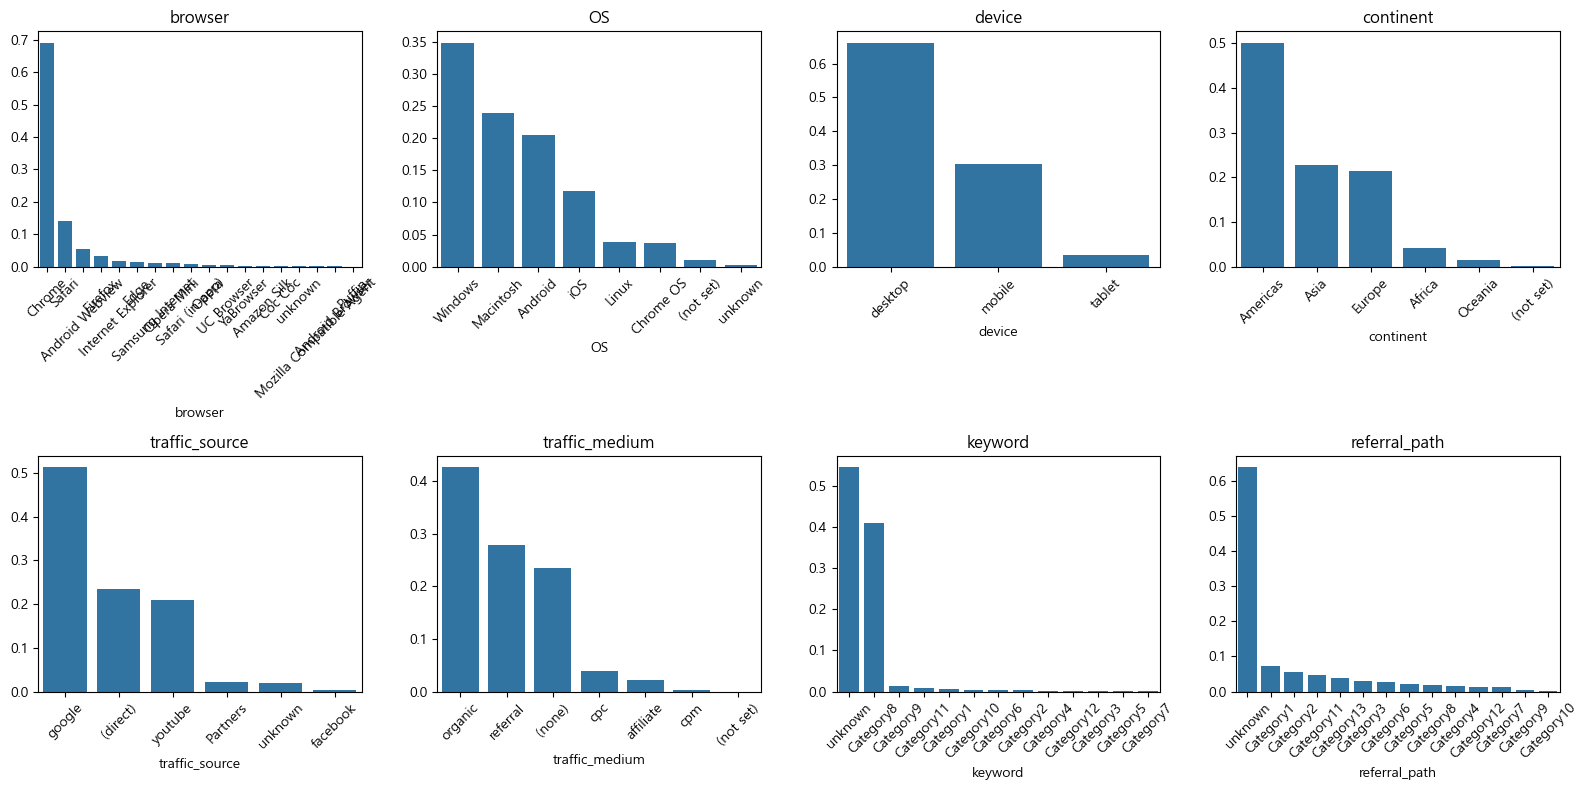

In [86]:
## 범주형 전처리한 데이터만 시각화
data_cleaning = df.drop(['subcontinent', 'country'], axis=1)

object_col = data_cleaning.describe(include ='object').columns.tolist()[2:]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, col in enumerate(object_col):  
    counts = df[col].value_counts(normalize=True).values
    categories = df[col].value_counts(normalize=True).index
    
    sns.barplot(x=categories, y=counts, ax=axes[i//4, i%4])
    axes[i//4, i%4].tick_params(axis='x', rotation=45)
    axes[i//4, i%4].set_title(col)
    
plt.tight_layout()
plt.show()

### 이상치 전처리

#### quality 이상치 처리
quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)<br>
따라서, 거래가 높을수록 quality가 높지 않을까? 그것을 확인해서 전처리를 진행
그렇다면 거래 성사라는 것이 어떤 변수인지 상관성이 있는 변수를 찾는다. 

해당 변수들이 거래와 관련된 변수이다 

- transaction : 세션 내에서 발생의 거래의 수- 
transaction_revenue : 총 거래 수익

In [ ]:
## 퀄리티가 떨어지는 데이터가 훨씬 많다.
# data.groupby('quality').size().tolist()

In [ ]:
# ## 1. quality를 5개의 범위로 나눠서 구간을 생성 
# data['cate_quality'] = pd.cut(data['quality'], bins=[0,20,40,60,80,100], right=True)
# data

# ## 2. data scaling으로만 정리

#### duration 이상치 처리
단위가 초이기 때문에 시간으로 더 줄이면 특이한 패턴(장시간 페이지에 존재를 파악할 수 있다.)으로 학습에 사용하기 편리할 수 있다.

In [ ]:
aa = data.duration//60 ## 분당 
len(aa.unique())
(aa//60).unique()

#### transaction_revenue 이상치 처리 (transaction 거래 수 이기 때문에 그냥 바로 사용해도 된다. 라벨인코딩형태로)
transaction_revenue

In [ ]:
# 표준편차가 매우 크다 따라서 이상치가 너무 높다는 것
# data.transaction_revenue.describe()

In [ ]:
# data[data.transaction_revenue == 0][['TARGET','traffic_medium']]

### 데이터 스케일

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer

minmax_scaler = MinMaxScaler()

standard_scaler = StandardScaler()

robust_scaler = RobustScaler()

maxabs_scaler = MaxAbsScaler()

quantile_scaler = QuantileTransformer()

In [ ]:
# data_scale = minmax_scaler.fit_transform(data.select_dtypes(exclude='object'))
# data_scale

In [ ]:
# new_data = pd.DataFrame(data_scale, columns = data.select_dtypes(exclude='object').columns)
# new_data

In [ ]:
# new_data.describe()

In [ ]:
# num_cols = new_data.columns.tolist()
# fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# ## 박스플롯
# for idx, col in enumerate(num_cols):
#     sns.boxplot(y=new_data[col], ax=axes[idx//4, idx%4], color='g') 
#     axes[idx//4, idx%4].set_title(col)
 
# plt.tight_layout()
# plt.show()

### 더미변수 생성

In [ ]:
## 데이터 분할
X = data.drop(['sessionID', 'userID', 'TARGET'],axis=1)
test = test_data.drop(['sessionID', 'userID'],axis=1)
Y = data.TARGET

In [ ]:
new_X = pd.get_dummies(X)
new_test = pd.get_dummies(test)

In [ ]:
x_scale = minmax_scaler.fit_transform(new_X[['quality','duration','transaction_revenue']])
test_scale = minmax_scaler.fit_transform(new_test[['quality','duration','transaction_revenue']])

In [ ]:
new_X.drop(['quality','duration','transaction_revenue'],axis=1, inplace=True)
new_test.drop(['quality','duration','transaction_revenue'],axis=1, inplace=True)

In [ ]:
x_scale = pd.DataFrame(x_scale, columns=['quality','duration','transaction_revenue'])
x_scale

In [ ]:
pd.concat([new_X, x_scale], axis=1)

In [ ]:
## 데이터 스케일링 적용
x_scale = minmax_scaler.fit_transform(new_X[['quality','duration','transaction_revenue']])

## 학습용 데이터 생성
# x_train, x_valid, y_train, y_valid = train_test_split(x_scale, Y, test_size=0.2, shuffle=True, random_state=1106)

### 범주형 전처리

In [ ]:
data.describe(include='object')

## 데이터 분리 - Hold_out

In [ ]:
## 데이터 분할
X = data.drop(['sessionID', 'userID', 'TARGET'],axis=1)
Y = data.TARGET

In [ ]:
from sklearn.model_selection import train_test_split

## 연속형 데이터로 모델 학습
x = X.select_dtypes(exclude='object')

## 데이터 스케일링 적용
x_scale = minmax_scaler.fit_transform(x)

## 학습용 데이터 생성
x_train, x_valid, y_train, y_valid = train_test_split(x_scale, Y, test_size=0.2, shuffle=True, random_state=1106)

## 모델 파트

In [ ]:
from sklearn.metrics import mean_squared_error

### RandomForestRegressor 모델 생성

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [ ]:
# 모델 생성
rf_model = RandomForestRegressor(random_state=1106, n_jobs=-1)

## 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### 랜덤 서치

In [ ]:
# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, n_jobs=-1, cv=KFold(n_splits=5, shuffle=True))

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터와 평가 점수 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)
print("최고의 평가 점수:", random_search.best_score_)

### 그리드 서치

In [ ]:
# 그리드 서치 객체 생성
grid_search = GridSearchCV(rf_model, param_grid=param_grid, n_jobs=-1, cv=KFold(n_splits=3, shuffle=True))

# 그리드 서치 수행
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터와 평가 점수 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고의 평가 점수:", grid_search.best_score_)

#### 모델 학습

In [ ]:
# 랜덤포레스트 학습
rf_model = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
rf_model.fit(x_train, y_train)

#### 모델 성능 평가

In [ ]:
# 훈련 세트의 예측값 계산
y_train_pred = rf_model.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = rf_model.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

#### 모델 예측

In [ ]:
test_data = test_data.drop(columns=['sessionID', 'userID'],axis=1)
test_data

In [ ]:
## 연속형 데이터로 모델 학습
test_data = test_data.select_dtypes(exclude='object')

## 데이터 스케일링 적용
test_data_scale = minmax_scaler.transform(test_data)

In [ ]:
preds = rf_model.predict(test_data_scale)

#### Submission

In [ ]:
submission = pd.read_csv('D:/3차프로젝트/Weblog_Data/sample_submission.csv')
submission

In [ ]:
submission['TARGET'] = preds
submission

In [ ]:
submission.to_csv('./rf_model_scaling_submission.csv', index=False)

### LinearRegression 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#### 모델 학습

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

print("가중치(계수, 기울기 파라미터 W) :", model.coef_)
print("편향(절편 파라미터 b) :", model.intercept_)

print("훈련세트 점수: {:.2f}".format(model.score(x_train, y_train)))
print("검증세트 점수: {:.2f}".format(model.score(x_valid, y_valid)))

In [ ]:
model2 = Ridge(alpha=.5)
model2.fit(x_train, y_train)

print("가중치(계수, 기울기 파라미터 W) :", model2.coef_)
print("편향(절편 파라미터 b) :", model2.intercept_)

print("훈련 세트 점수: {:.2f}".format(model2.score(x_train, y_train)))
print("검증 세트 점수: {:.2f}".format(model2.score(x_valid, y_valid)))

#### 모델 성능 평가

In [ ]:
from sklearn.metrics import mean_squared_error

# 훈련 세트의 예측값 계산
y_train_pred = model.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = model.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

In [ ]:
# 훈련 세트의 예측값 계산
y_train_pred = model2.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = model2.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

#### 모델 예측

In [ ]:
test_data = test_data.drop(columns=['sessionID','userID'],axis=1)
test_data

In [ ]:
## 연속형 데이터로 모델 학습
test_data = test_data.select_dtypes(exclude='object')

## 데이터 스케일링 적용
test_data_scale = minmax_scaler.transform(test_data)

In [ ]:
preds = model.predict(test_data_scale)

#### Submission

In [ ]:
submission = pd.read_csv('D:/3차프로젝트/Weblog_Data/sample_submission.csv')
submission

In [ ]:
submission['TARGET'] = preds
submission

In [ ]:
submission.to_csv('./linear_scaling_submission.csv', index=False)

## 연습장

In [ ]:
fav_subject = np.array(['math', 'math', 'english', 'science', 'english', 'science', 
                        'math', 'english', 'science', 'math', 'science', 'english'])
club_list = np.array(['music', 'art', 'art', 'book', 'music', 'music', 
                      'art', 'book', 'book', 'music', 'art', 'book'])
gender_list = np.array(['boy', 'girl', 'girl', 'boy', 'girl', 'girl',
                       'boy', 'boy', 'boy', 'girl', 'girl', 'boy'])
grade_list = np.array(['1', '3', '2', '2', '3', '2',
                      '2', '1', '1', '3', '2', '3'])
num_list = np.array(['123', '367764', '22', '2', '3', '1',
                      '0', '112', '13213', '3246', '0', '634563'])
student = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6',
          'S7', 'S8', 'S9', 'S10', 'S11', 'S12']

grade_list = grade_list.astype(int)
num_list = num_list.astype(int)

data = pd.DataFrame({'student':student, 
                     'fav_subject':fav_subject, 
                     'club_list':club_list, 
                     'gender_list':gender_list,
                     'grade_list':grade_list,
                     'num_list':num_list})
# data = data.set_index('student')
data

cost = []
K = range(1, 7)
for num in K:
    kmode = KModes(n_clusters = num, n_init = 3)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('cost')
plt.title('elbow method for finding optimal K')
plt.show()
kmode = KModes(n_clusters = 2, n_init = 3)
clusters = kmode.fit_predict(data)
data['clusters'] = clusters


In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
num_data = data.select_dtypes(exclude="object")
transformed_data = pt.fit_transform(num_data)

num_data_2 = pd.DataFrame(transformed_data,columns=num_data.columns)
num_data_2

In [ ]:
from scipy.stats import norm

# 평균과 표준편차
mean = np.mean(new_data.TARGET)
std = np.std(new_data.TARGET)

# 정규분포 확률밀도 함수
x = np.linspace(min(new_data.TARGET), max(new_data.TARGET), 1000)
y = norm.pdf(x, mean, std)

plt.plot(x, y)

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.show()